In [15]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [7]:
y_train = pd.read_csv('data/y_train.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0)
X_train = np.load('data/X_train_embeddings.npy')
X_test = np.load('data/X_test_embeddings.npy')

In [10]:
gbm = lgb.LGBMClassifier(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=500)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)])

y_pred = gbm.predict(X_test)

/home/panchoz/miniconda3/envs/ghtopic/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/panchoz/miniconda3/envs/ghtopic/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's multi_logloss: 1.54335
[2]	valid_0's multi_logloss: 1.51032
[3]	valid_0's multi_logloss: 1.48288
[4]	valid_0's multi_logloss: 1.45534
[5]	valid_0's multi_logloss: 1.42991
[6]	valid_0's multi_logloss: 1.4079
[7]	valid_0's multi_logloss: 1.38745
[8]	valid_0's multi_logloss: 1.36866
[9]	valid_0's multi_logloss: 1.35048
[10]	valid_0's multi_logloss: 1.33245
[11]	valid_0's multi_logloss: 1.31512
[12]	valid_0's multi_logloss: 1.30247
[13]	valid_0's multi_logloss: 1.28898
[14]	valid_0's multi_logloss: 1.27576
[15]	valid_0's multi_logloss: 1.26417
[16]	valid_0's multi_logloss: 1.2516
[17]	valid_0's multi_logloss: 1.24142
[18]	valid_0's multi_logloss: 1.2302
[19]	valid_0's multi_logloss: 1.22097
[20]	valid_0's multi_logloss: 1.21076
[21]	valid_0's multi_logloss: 1.2017
[22]	valid_0's multi_logloss: 1.19266
[23]	valid_0's multi_logloss: 1.1836
[24]	valid_0's multi_logloss: 1.17588
[25]	valid_0's multi_logloss: 1.16874
[26]	valid_0's multi_logloss: 1.16207
[27]	valid_0's multi_loglo

                                  precision    recall  f1-score   support

            Application software       0.46      0.23      0.30        84
                   Documentation       0.79      0.45      0.57        83
Non-web libraries and frameworks       0.67      0.72      0.69       282
                  Software tools       0.61      0.65      0.63       192
                 System software       1.00      0.06      0.11        35
    Web libraries and frameworks       0.68      0.87      0.76       302

                        accuracy                           0.66       978
                       macro avg       0.70      0.49      0.51       978
                    weighted avg       0.67      0.66      0.64       978



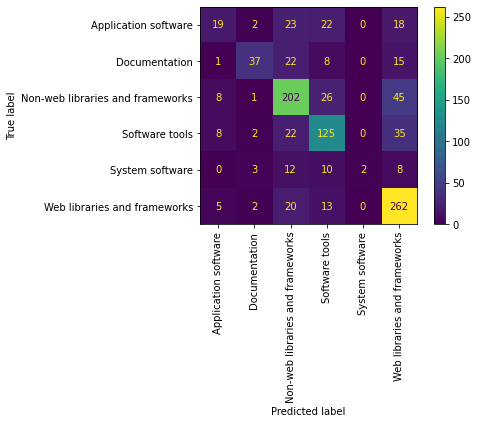

In [19]:
labels = ['Application software',
        'Documentation',
        'Non-web libraries and frameworks',
        'Software tools',
        'System software',
        'Web libraries and frameworks']

report = classification_report(y_test,y_pred, target_names=labels)
print(report)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=labels), display_labels=labels).plot(xticks_rotation='vertical')